In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared
import scipy
import pandas as pd
from scipy.optimize import differential_evolution
import warnings
warnings.filterwarnings("ignore")

In [2]:
def target(x):
    """
    Function to optimise
    """
    f = np.sin( 3 * np.pi * x**3) - 0.5 * np.sin(8 * np.pi * x**3)
    f /= 2
    return f

In [174]:
dict_dataset = {}
dict_dataset['x'] =  [0.1, 0.5, 0.75, 0.2, 0.59]
dict_dataset['y'] =  [-0.0015702, 0.46193977, -0.13950568, -0.01226409, 0.69227033]  
dataset = pd.DataFrame(dict_dataset)

In [175]:
dataset

,x,y
0,0.10,-0.001570
1,0.50,0.461940
2,0.75,-0.139506
3,0.20,-0.012264
4,0.59,0.692270


In [52]:
dataset = dataset.sort_values(by=['x'])

In [57]:
dataset

,x,y
0,0.10,-0.001570
3,0.20,-0.012264
1,0.50,0.461940
4,0.59,0.692270
2,0.75,-0.139506


In [75]:
X = dataset['x'].to_numpy().reshape(-1,1)
Y = dataset['y'].to_numpy().reshape(-1,1)
kernel = RBF(length_scale=0.1) 
model = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=35,normalize_y=True).fit(X,Y)

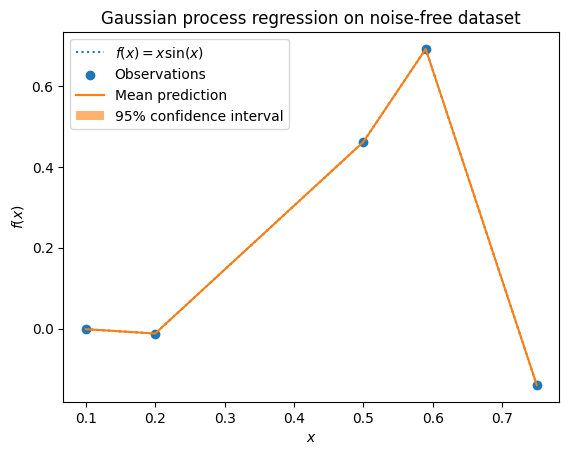

In [56]:
model.fit(X,Y)
mean_prediction, std_prediction = model.predict(X, return_std=True)
plt.plot(X, Y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X, Y, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.6,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [18]:
def phi(x):
    return scipy.stats.norm.pdf(x)

def Phi(x):
    return scipy.stats.norm.cdf(x)

def EI(mu, sigma, f_best):
    s = (f_best - mu)/sigma
    return (sigma*s * Phi(s) + sigma*phi(s))
    
def PI(mu, sigma,f_best):
    s = (f_best - mu)/sigma
    return (Phi(s))

def LCB(mu, sigma,beta):
    return (mu - beta*sigma)

In [143]:
x  = np.linspace(0,1,100)
mean,std = model.predict(x.reshape(-1,1),return_std=True)


In [144]:
result  = EI(mean,std,min(list(dataset['y'])))

In [41]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [39]:
result

array([5.78318696e-07, 7.88029778e-02, 8.42938796e-09, 2.42040416e-71,
       3.41071909e-09, 5.30017358e-02, 2.47124329e-04, 8.92070713e-06,
       7.90933130e-02, 2.29284538e-02])

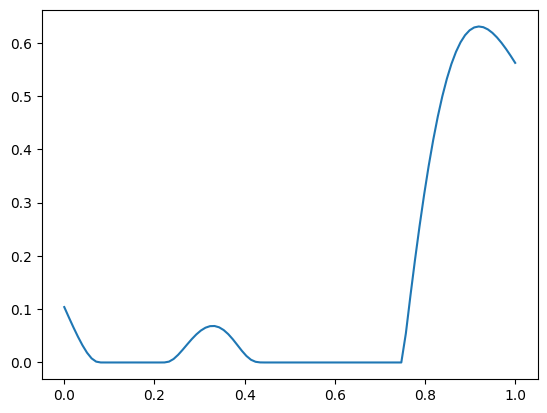

In [145]:
plt.plot(x,result)

In [83]:
Y = target(x)

In [63]:
x = x.reshape(-1,1)

In [84]:
Y

array([[ 0.00000000e+00],
       [-1.61887864e-06],
       [-1.29510288e-05],
       [-4.37097106e-05],
       [-1.03608063e-04],
       [-2.02358565e-04],
       [-3.49671259e-04],
       [-5.55249236e-04],
       [-8.28778930e-04],
       [-1.17991159e-03],
       [-1.61823095e-03],
       [-2.15320028e-03],
       [-2.79408057e-03],
       [-3.54980886e-03],
       [-4.42882415e-03],
       [-5.43882537e-03],
       [-6.58644354e-03],
       [-7.87680753e-03],
       [-9.31298037e-03],
       [-1.08952404e-02],
       [-1.26201800e-02],
       [-1.44795922e-02],
       [-1.64591172e-02],
       [-1.85366197e-02],
       [-2.06802714e-02],
       [-2.28463228e-02],
       [-2.49765511e-02],
       [-2.69953934e-02],
       [-2.88067891e-02],
       [-3.02907860e-02],
       [-3.13000014e-02],
       [-3.16560733e-02],
       [-3.11462995e-02],
       [-2.95207265e-02],
       [-2.64900355e-02],
       [-2.17246630e-02],
       [-1.48556928e-02],
       [-5.47815654e-03],
       [ 6.8

In [141]:
X = dataset['x'].to_numpy().reshape(-1,1)
Y = dataset['y'].to_numpy().reshape(-1,1)
kernel = RBF(length_scale=0.1,length_scale_bounds=(0.1,100)) 
model = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=95).fit(X,Y)

In [137]:
#model.get_params(deep=True)
model.kernel_.get_params()

{'length_scale': 0.17365884651992644, 'length_scale_bounds': (0.1, 100)}

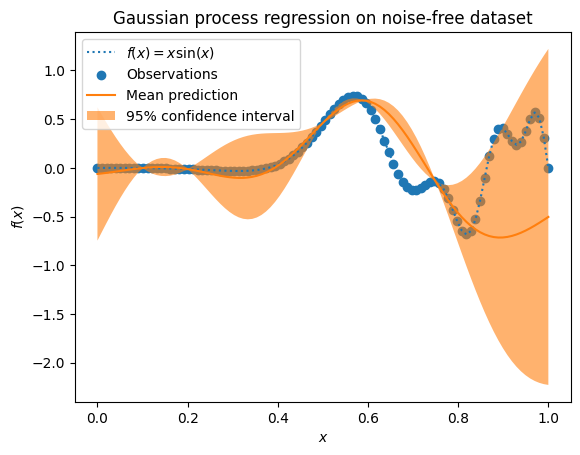

In [142]:
x  = np.linspace(0,1,100)
x =x.reshape(-1,1)
Y = target(x)
#model.fit(x,Y)
mean_prediction, std_prediction = model.predict(x, return_std=True)
plt.plot(x, Y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(x, Y, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.6,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [149]:
x  = np.linspace(0,1,100)
mean,std = model.predict(x.reshape(-1,1),return_std=True)

In [150]:
result  = PI(mean,std,min(list(dataset['y'])))

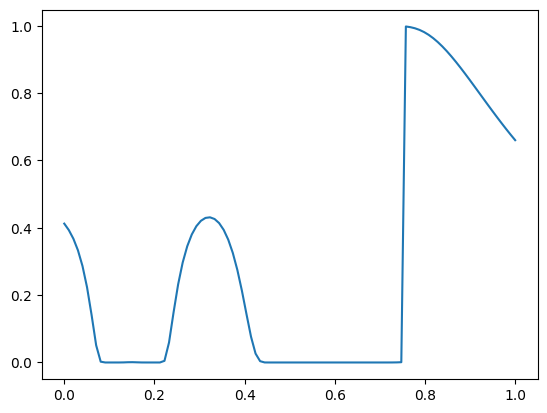

In [151]:
plt.plot(x,result)

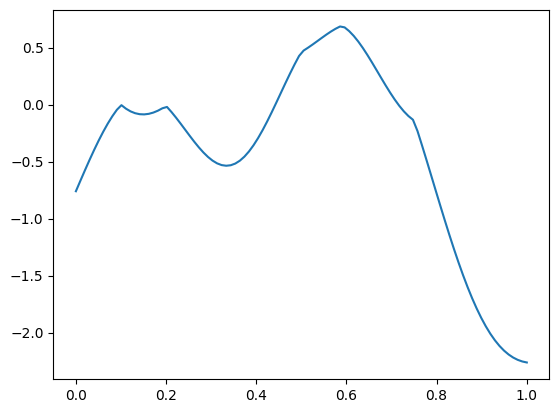

In [131]:
x  = np.linspace(0,1,100)
mean,std = model.predict(x.reshape(-1,1),return_std=True)
result  = LCB(mean,std,2)
plt.plot(x,result)


In [167]:
def EI_2(x,model,f_best):
    x= x.reshape(-1,1)
    mu,sigma = model.predict(x,return_std=True)
    mu = -mu
    sigma = -sigma
    s = (f_best - mu)/sigma
    return -(sigma*s * Phi(s) + sigma*phi(s))


In [176]:
from scipy import optimize
from scipy.optimize import Bounds
bounds = [(0,1)]
fbest_global = min(dataset['y'])
for i in range(10):
    X,Y = dataset['x'],dataset['y']
    X= X.to_numpy().reshape(-1,1)
    Y= Y.to_numpy().reshape(-1,1)
    model = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=95).fit(X,Y)
    fbest = min(dataset['y'])
    res = optimize.differential_evolution(EI_2,bounds=bounds,args=(model,fbest))
    result = res.x
    y_new = target(result)
    dataset.loc[len(dataset.index)]=[result,y_new]
    




In [177]:
dataset

,x,y
0,0.1,-0.00157
1,0.5,0.46194
2,0.75,-0.139506
3,0.2,-0.012264
4,0.59,0.69227
5,[0.9053831344663181],[0.3754318396187405]
6,[0.3395287869740681],[-0.027848592337692712]
7,[0.7845488069455542],[-0.38937457578415213]
8,[0.8076271729547054],[-0.6400186775650072]
9,[0.8384155841492957],[-0.5281052652084487]


In [173]:
dataset

,x,y
0,0.1,-0.00157
3,0.2,-0.012264
1,0.5,0.46194
4,0.59,0.69227
2,0.75,-0.139506
...,...,...
63,[0.8188011247441536],[-0.6833706514815783]
64,[0.8187151447300104],[-0.6833677826247586]
65,[0.8193288689467882],[-0.6832643426607341]
66,[0.8187409460490543],[-0.6833692353345114]
